# **Describing Distributions**
*   Samar KRIMI
*   10/11/2023

---

Analyzing & Visualizing several features in the Medical Dataset : https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data

The features to analyze :
* VitD_levels
* Doc_visits
* TotalCharge

# EDA

In [ ]:
## Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

In [ ]:
## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Load in Data
df = pd.read_csv('/content/data.csv')
# Display .head
pd.set_option('display.max_column', None)
df.head()

,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [ ]:
# Remove the Unnamed column using the drop() method
df = df.drop("Unnamed: 0", axis=1)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [ ]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               1000 non-null   object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                1000 non-null   object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             1000 non-null   object 
 8   Gender              1000 non-null   object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       1000 non-null   object 
 16  HighBlo

In [ ]:
# Check for exact duplicates (rows) : No duplicated
df.duplicated().sum()

0

In [ ]:
# Check missing values
df.isna().sum().sum()

37

In [ ]:
# Check missing values in each column
df.isna().sum()

State                 0
Lat                   0
Lng                   0
Area                  0
Children              7
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

### **Analyzing & visualizing :**

* VitD_levels
* Doc_visits
* TotalCharge

No need to perform futher EDA.

> **VitD_levels feature**

In [ ]:
# Check VitD_levels feature
df['VitD_levels']

0      19.141466
1      18.940352
2      18.057507
3      16.576858
4      17.439069
         ...    
995    16.631573
996    17.810233
997    17.011913
998    16.526670
999    19.487658
Name: VitD_levels, Length: 1000, dtype: float64

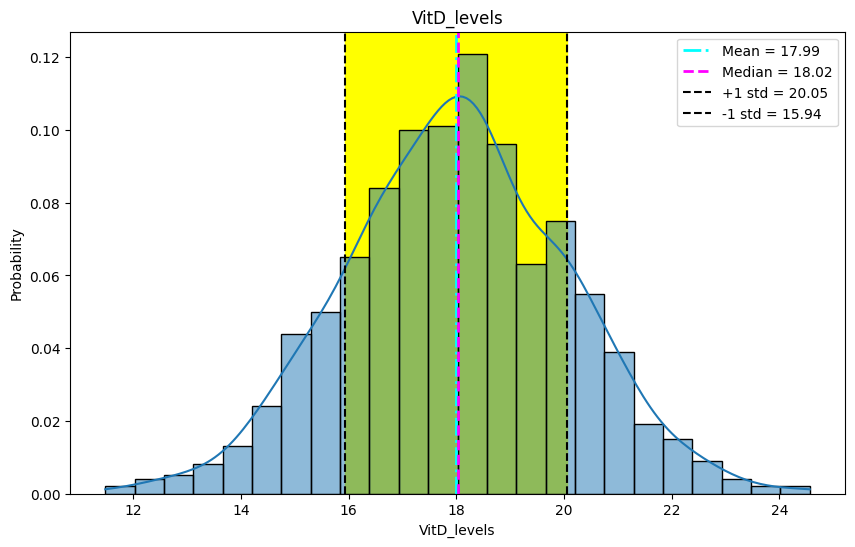

In [ ]:
col = 'VitD_levels'
feature = df[col]

mean = feature.mean()
median = feature.median()
mode=stats.mode(feature)
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

## Plot 'VitD_levels' Histogram with KDE
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability', kde = True)

ax.axvline(mean, ls='-.', color = 'cyan', linewidth = 2, label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'magenta', linewidth = 2, label = f'Median = {median:,.2f}')

ax.axvline(plus_one_std,  ls='--', color = 'black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std,  ls='--', color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [ ]:
# Pearson calculation for 'VitD_levels' feature
from scipy import stats
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

* VitD_levels feature :

Continouous feature because the values are float & the histogram bars have no gaps in between them.

No skew because the mean, the median correspond to the same value, this is considered symmetrical.

Using the Pearson calculation, Mesokurtic (Kurtosis ~3)

> **Doc_visits feature**

In [ ]:
# Check Doc_visits feature
df['Doc_visits']

0      6
1      4
2      4
3      4
4      5
      ..
995    7
996    6
997    5
998    4
999    7
Name: Doc_visits, Length: 1000, dtype: int64

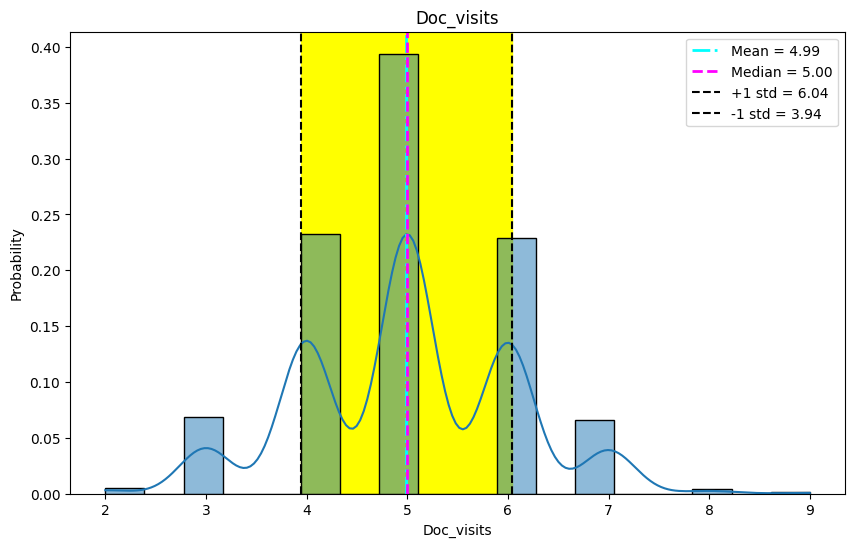

In [ ]:
col = 'Doc_visits'
feature = df[col]

mean = feature.mean()
median = feature.median()
mode=stats.mode(feature)
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

## Plot 'Doc_visits' Histogram with KDE
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability', kde = True)

ax.axvline(mean, ls='-.', color = 'cyan', linewidth = 2, label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'magenta', linewidth = 2, label = f'Median = {median:,.2f}')

ax.axvline(plus_one_std,  ls='--', color = 'black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std,  ls='--', color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [ ]:
# Pearson calculation for 'Doc_visits' feature
from scipy import stats
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

* Doc_visits feature :

Discrete feature because the values are whole numbers & the histogram bars also have gaps in between them.

No skew because the mean & the median correspond to the same value, this is considered symmetrical.

Using the Pearson calculation, Platykurtic (Kurtosis < 3)

> **TotalCharge feature**

In [ ]:
# Check TotalCharge feature
df['TotalCharge']

0      3726.702860
1      4193.190458
2      2434.234222
3      2127.830423
4      2113.073274
          ...     
995    2747.196682
996    3661.760740
997    5259.932456
998    3083.731857
999    2830.020820
Name: TotalCharge, Length: 1000, dtype: float64

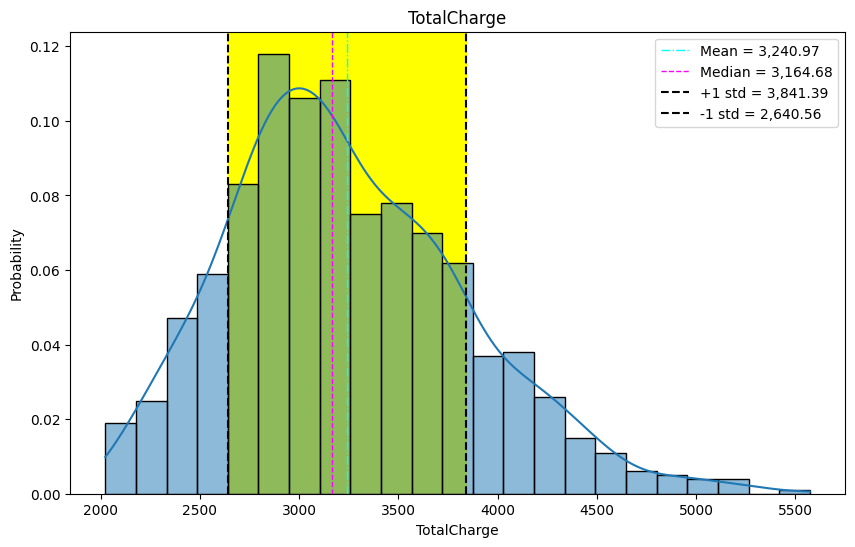

In [ ]:
col = 'TotalCharge'
feature = df[col]

mean = feature.mean()
median = feature.median()
mode=stats.mode(feature)
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

## Plot 'TotalCharge' Histogram with KDE
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability', kde = True)

ax.axvline(mean, ls='-.', color = 'cyan', linewidth = 1, label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'magenta', linewidth = 1, label = f'Median = {median:,.2f}')

ax.axvline(plus_one_std,  ls='--', color = 'black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std,  ls='--', color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [ ]:
# Pearson calculation for 'TotalCharge' feature
from scipy import stats
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

* TotalCharge feature :

Continouous feature because the values are float & the histogram bars have no gaps in between them.

Positively skewed distribution because the median is smaller than the mean also the right tail is more long. More of the values are grouped to the left.

Using the Pearson calculation, Leptokurtic (Kurtosis >3)  